# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('Life_Style_Expanded_Fitness_Data.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,4.99,17.14,Improves cardiovascular fitness,346.27,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Arms,Anterior,Triceps pushdowns
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,5.01,23.08,Strengthens back and legs,332.64,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Arms,Lats,Seated calf raises
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,4.00,18.91,Builds shoulder width,352.19,"Upper Back, Rear Deltoids",Barbell,Beginner,Forearms,Wrist Extensors,Russian twists
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,3.99,24.97,Builds calf muscles,329.22,"Rear Deltoids, Upper Back",Pull-up Bar,Intermediate,Shoulders,Anterior,Leg curls


### Explore The Dataset

In [3]:
df.shape

(20000, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            20000 non-null  float64
 1   Gender                         20000 non-null  object 
 2   Weight (kg)                    20000 non-null  float64
 3   Height (m)                     20000 non-null  float64
 4   Max_BPM                        20000 non-null  float64
 5   Avg_BPM                        20000 non-null  float64
 6   Resting_BPM                    20000 non-null  float64
 7   Session_Duration (hours)       20000 non-null  float64
 8   Calories_Burned                20000 non-null  float64
 9   Workout_Type                   20000 non-null  object 
 10  Fat_Percentage                 20000 non-null  float64
 11  Water_Intake (liters)          20000 non-null  float64
 12  Workout_Frequency (days/week)  20000 non-null 

In [5]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,is_healthy,Sets,Reps,Burns Calories (per 30 min)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,1258.139709,148.465602,302.719499,33.517447,61.502164,2.989303,0.088516,4.425059,19.427316,344.046515
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,716.618987,87.382817,115.711949,16.526869,33.579746,1.157692,0.284207,0.579596,3.679707,32.138782
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,19.220000,-3.890000,95.950000,3.950000,3.350000,0.930000,-0.020000,2.960000,4.850000,128.750000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,645.127500,71.970000,207.217500,18.587500,32.477500,1.940000,-0.000000,4.000000,16.120000,337.600000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,1267.650000,149.795000,300.015000,34.330000,60.920000,3.000000,0.000000,4.020000,19.900000,348.605000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,1850.892500,221.840000,401.860000,47.940000,89.375000,4.000000,0.010000,5.000000,22.880000,360.472500
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,2527.270000,303.990000,507.520000,61.290000,121.460000,5.060000,1.020000,5.050000,30.120000,381.710000


In [6]:
df.sample

<bound method NDFrame.sample of          Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0      34.91    Male        65.27        1.62   188.58   157.65        69.05   
1      23.37  Female        56.41        1.55   179.43   131.75        73.18   
2      33.20  Female        58.98        1.67   175.04   123.95        54.96   
3      38.69  Female        93.78        1.70   191.21   155.10        50.07   
4      45.09    Male        52.42        1.88   193.58   152.88        70.84   
...      ...     ...          ...         ...      ...      ...          ...   
19995  46.77  Female        98.31        1.90   199.20   148.18        63.72   
19996  40.38  Female        88.12        1.87   196.18   134.18        54.04   
19997  50.31    Male        46.20        1.67   163.34   157.92        61.65   
19998  52.36    Male        44.30        1.62   179.27   121.23        60.88   
19999  29.56    Male        58.63        1.61   198.07   121.74        72.05   

       

In [7]:
df.nunique()

Age                               3950
Gender                               2
Weight (kg)                       7042
Height (m)                          53
Max_BPM                           3808
Avg_BPM                           4801
Resting_BPM                       1939
Session_Duration (hours)           154
Calories_Burned                   4587
Workout_Type                         4
Fat_Percentage                   18492
Water_Intake (liters)              198
Workout_Frequency (days/week)       55
Experience_Level                    32
BMI                               3059
Daily meals frequency               31
Physical exercise                   67
Carbs                            12089
Proteins                          7332
Fats                              5524
Calories                          2471
meal_name                          908
meal_type                            4
diet_type                            6
sugar_g                           4947
sodium_mg                

## Exploratory Data Analysis

In [8]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Daily meals frequency            0
Physical exercise                0
Carbs                            0
Proteins                         0
Fats                             0
Calories                         0
meal_name                        0
meal_type                        0
diet_type                        0
sugar_g                          0
sodium_mg                        0
cholesterol_mg                   0
serving_size_g                   0
cooking_method      

In [9]:
df.duplicated().sum()

0

In [10]:
df.fillna(0, inplace=True)
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,4.99,17.14,Improves cardiovascular fitness,346.27,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Arms,Anterior,Triceps pushdowns
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,5.01,23.08,Strengthens back and legs,332.64,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Arms,Lats,Seated calf raises
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,4.00,18.91,Builds shoulder width,352.19,"Upper Back, Rear Deltoids",Barbell,Beginner,Forearms,Wrist Extensors,Russian twists
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,3.99,24.97,Builds calf muscles,329.22,"Rear Deltoids, Upper Back",Pull-up Bar,Intermediate,Shoulders,Anterior,Leg curls


In [13]:
num_cols = ['Age', 'Height (m)', 'Weight (kg)', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned','Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI', 'Daily meals frequency', 'Physical exercise', 'is_healthy']

cat_cols = ['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout']

print(len(num_cols))
print(len(cat_cols))

13
14


In [14]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

## Visualization

### 1. Histogram Of Num_Cols

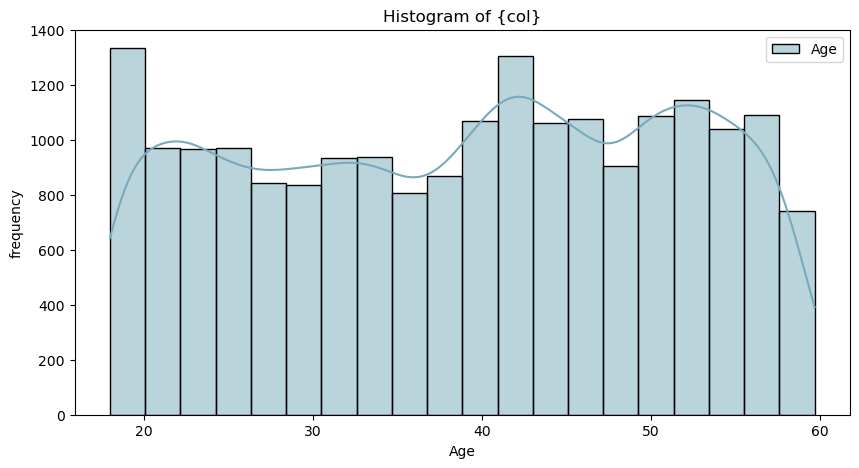

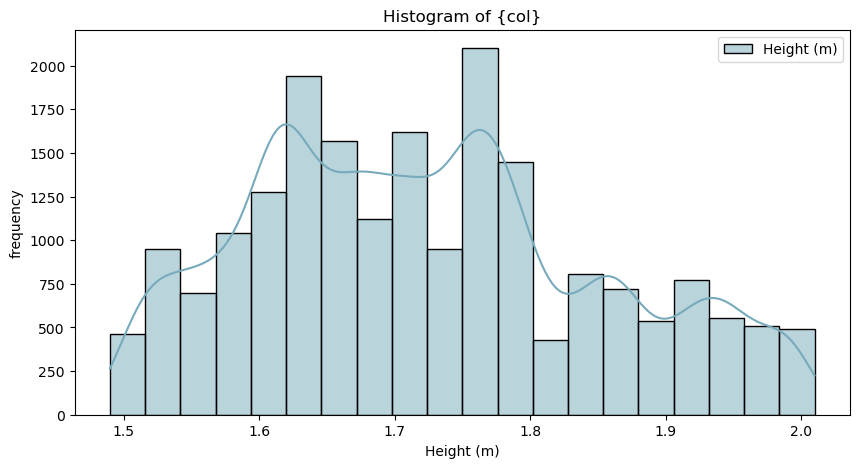

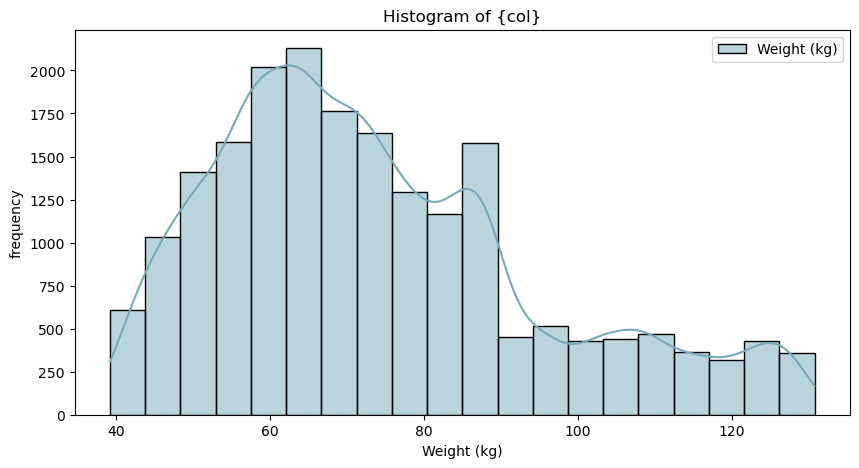

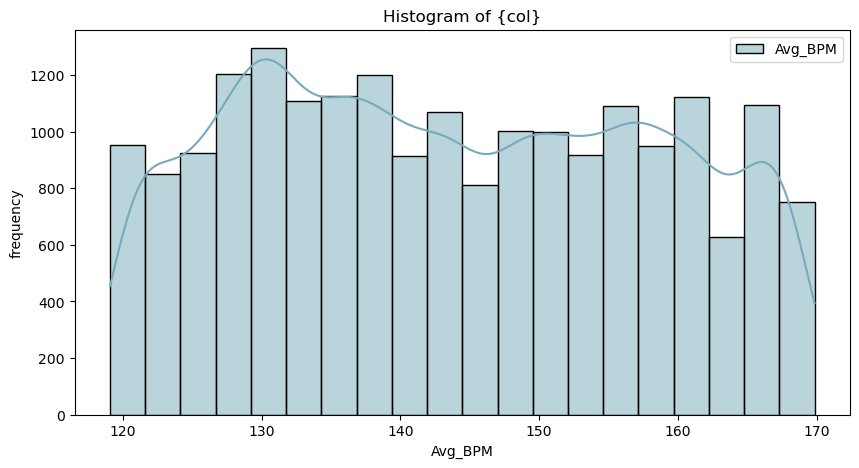

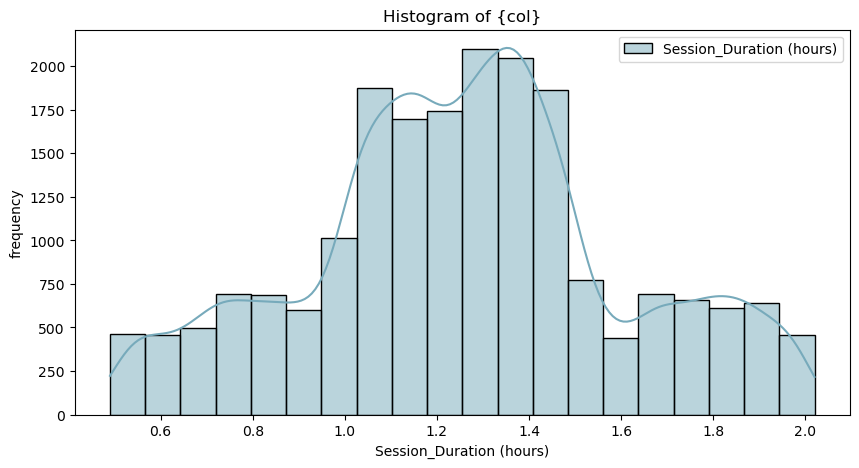

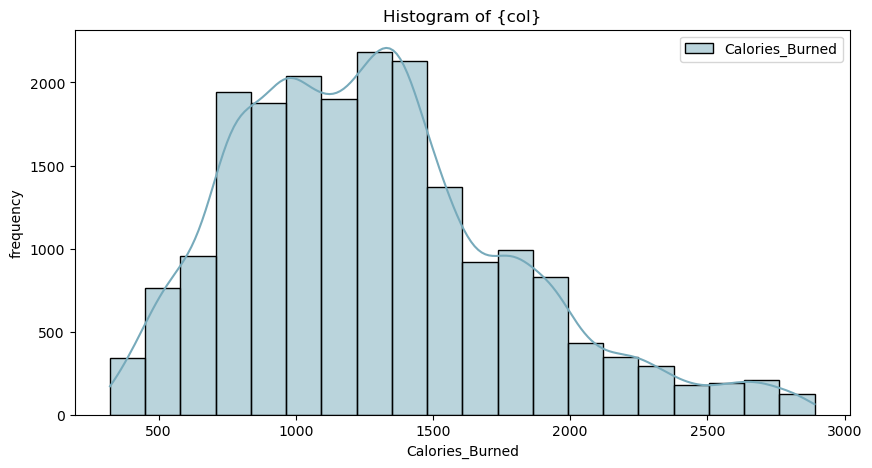

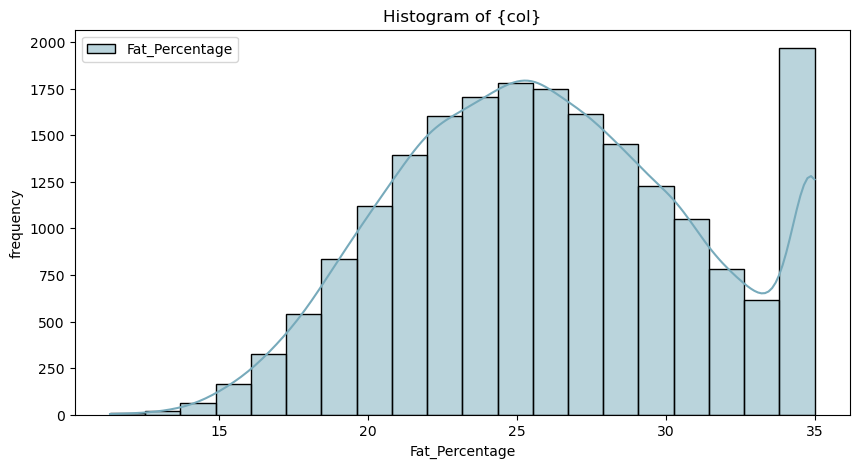

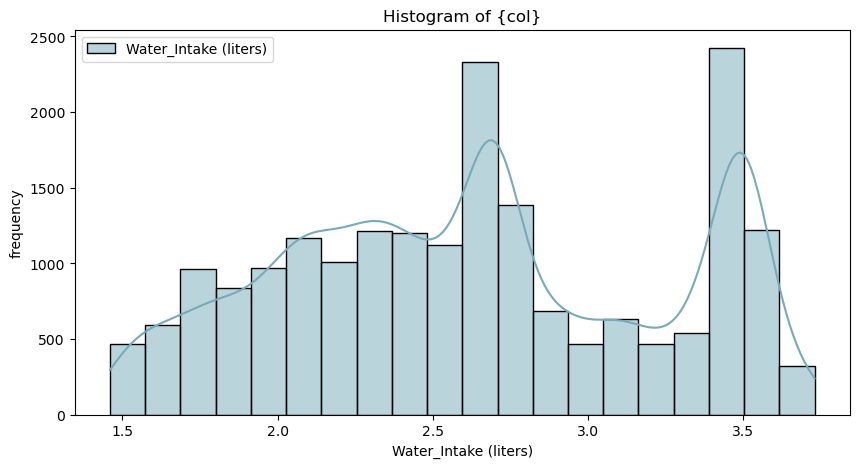

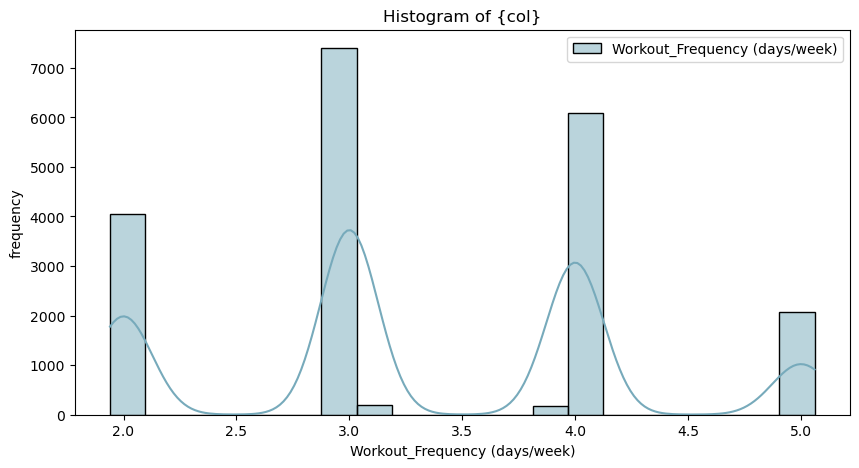

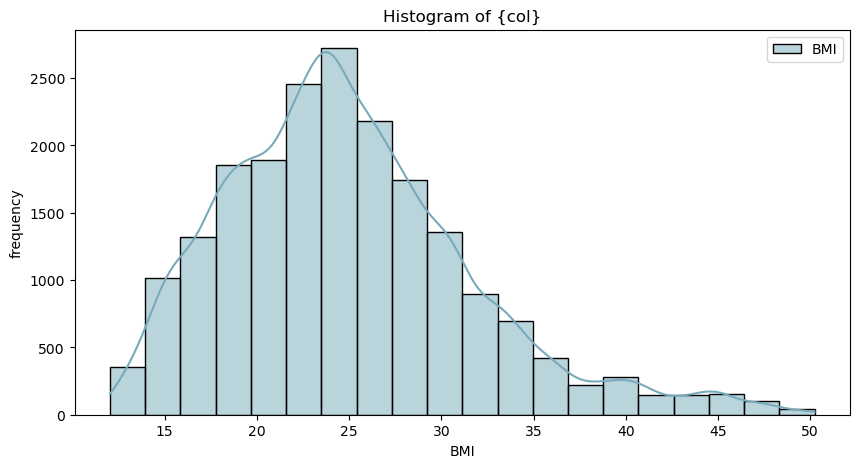

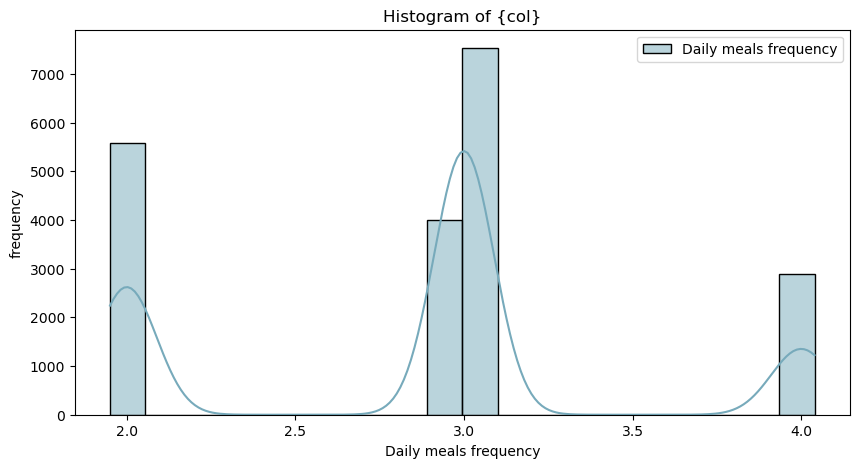

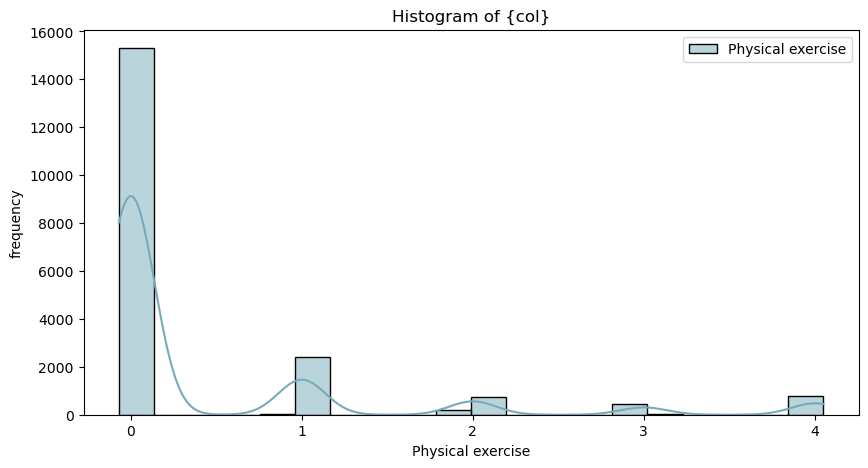

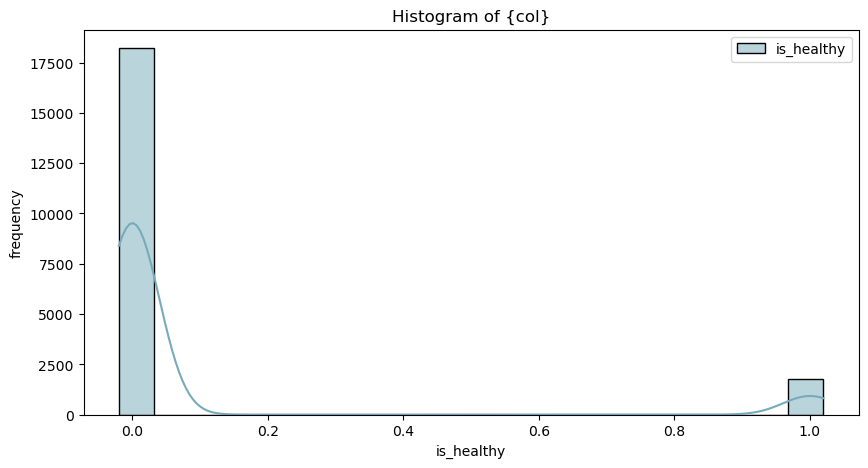

In [47]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='blend:#7AB,#EDA', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

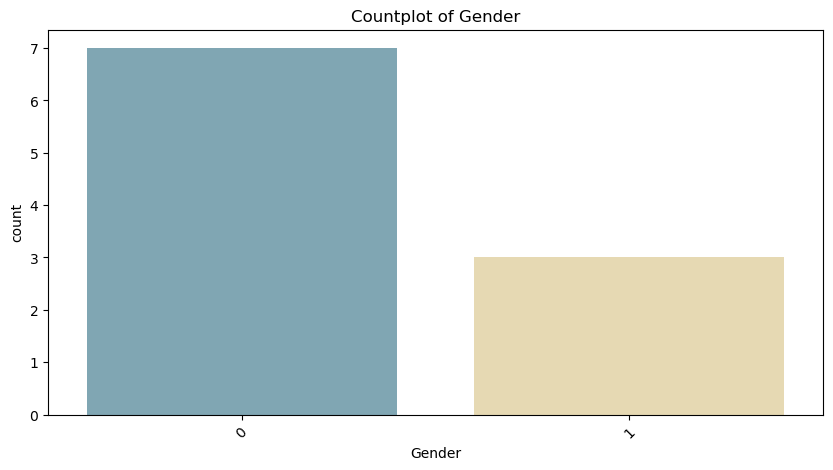

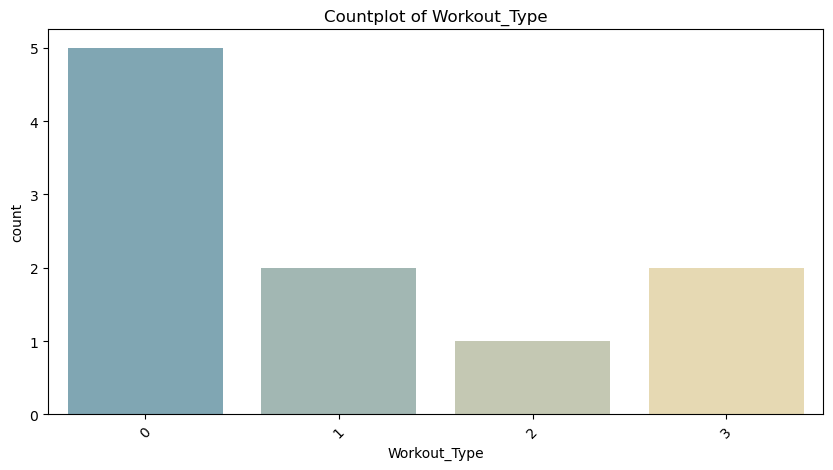

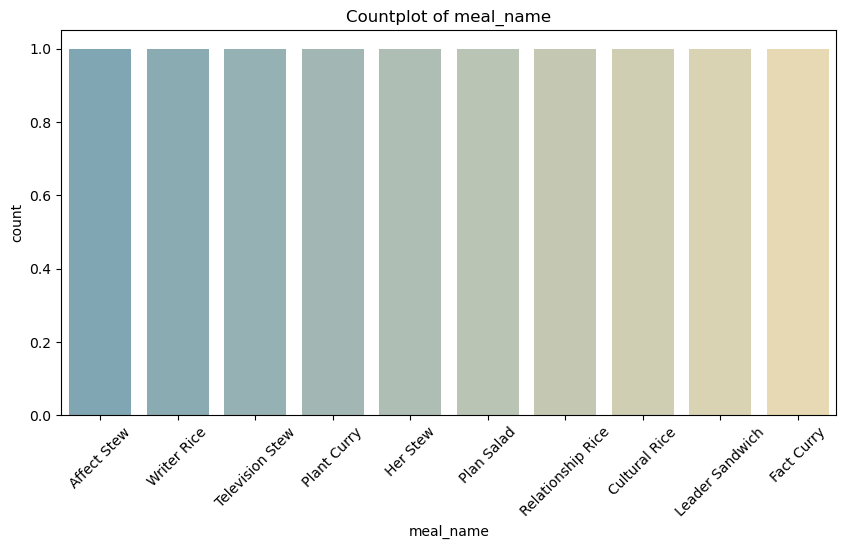

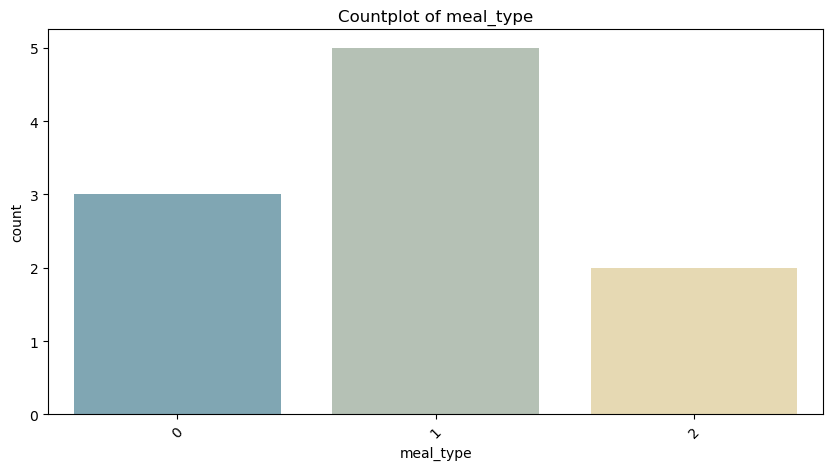

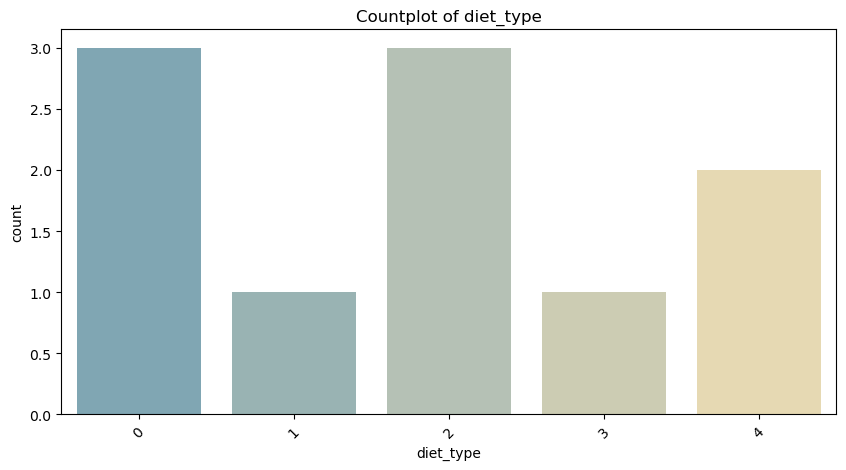

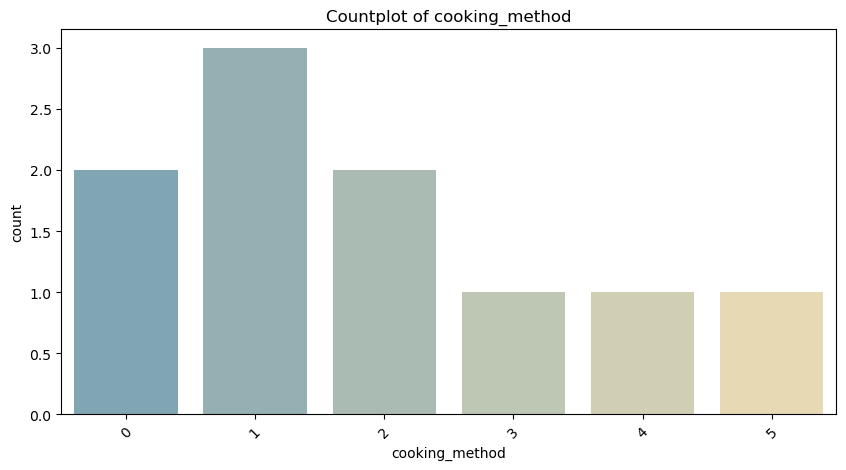

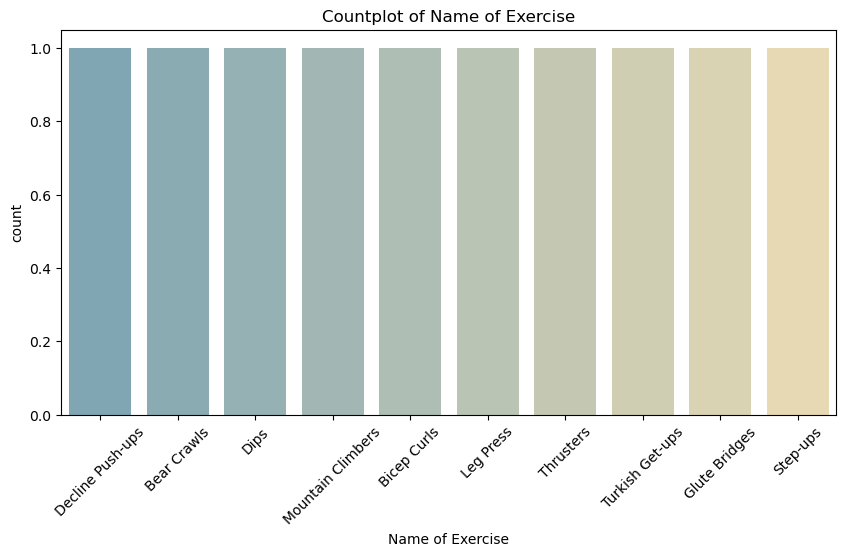

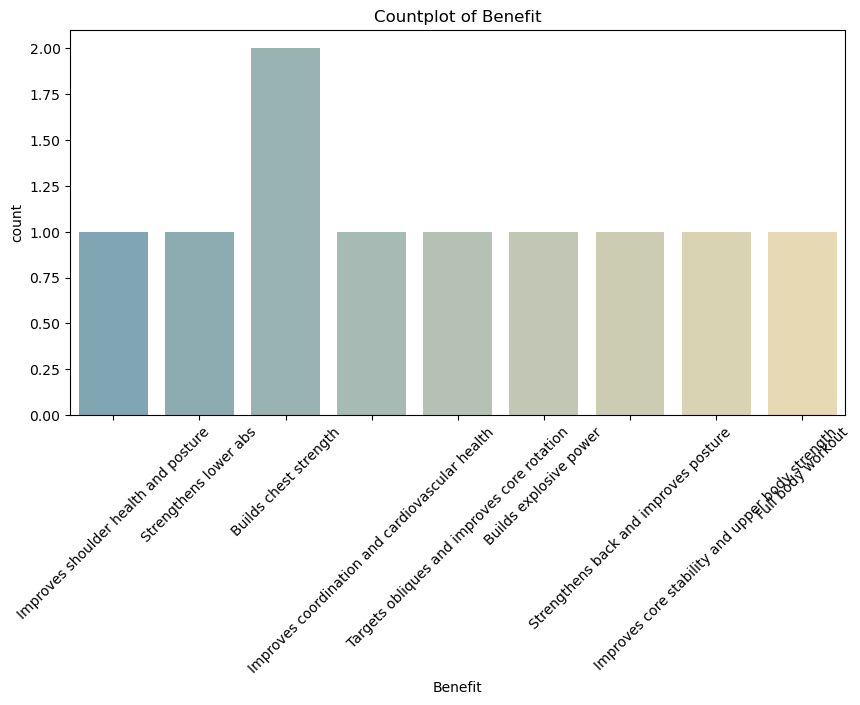

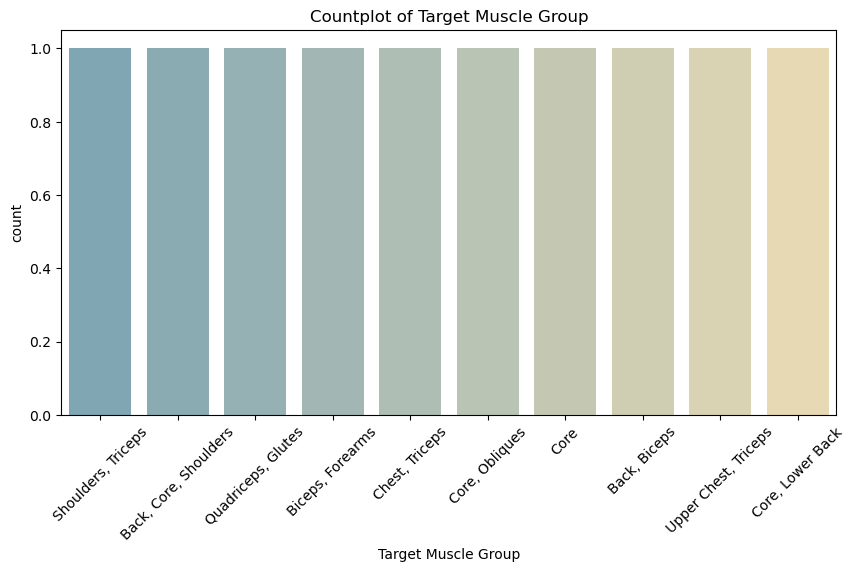

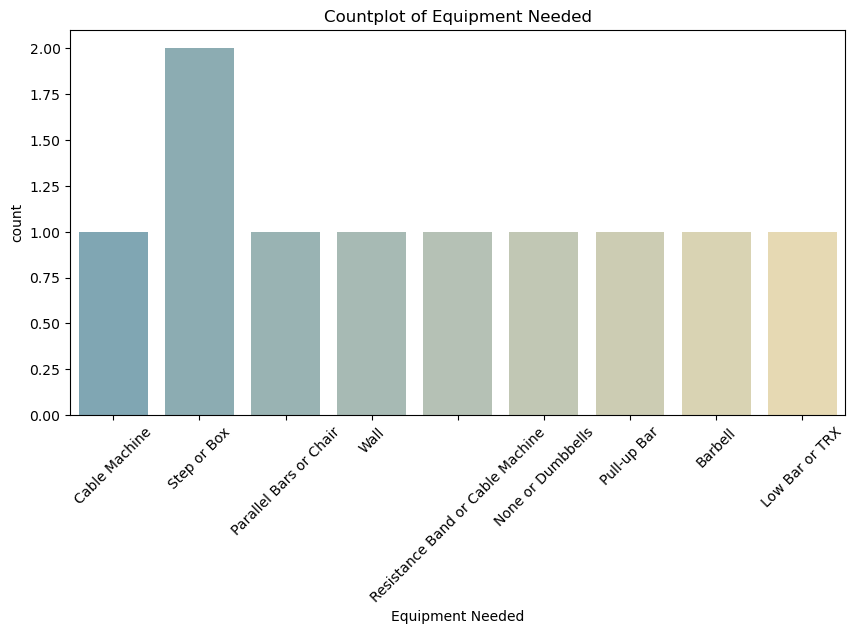

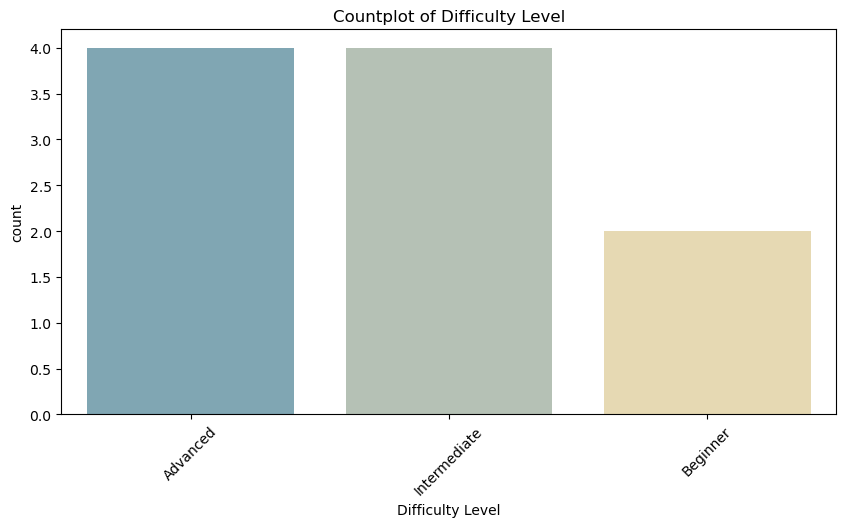

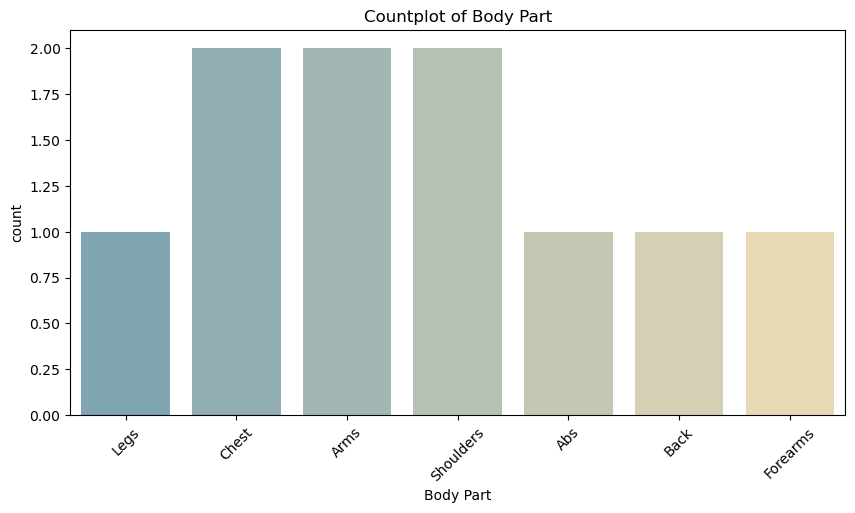

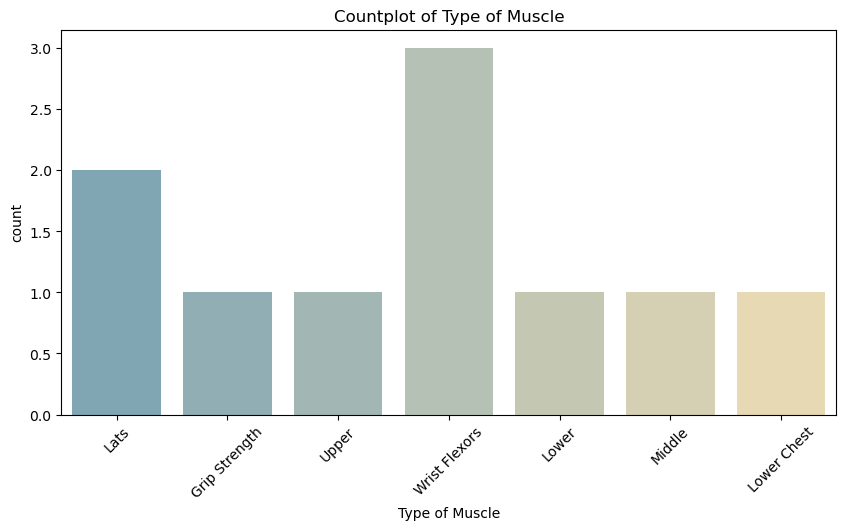

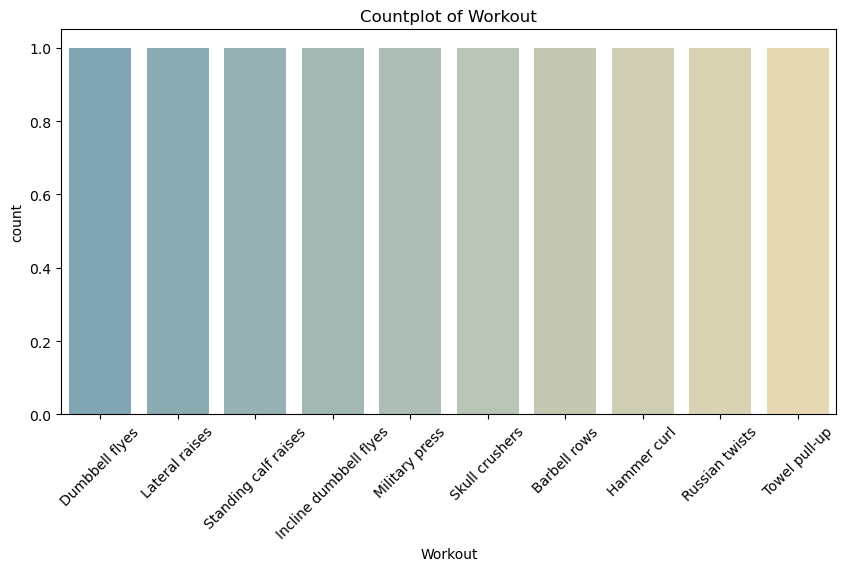

In [48]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df.head(10), x=col, palette='blend:#7AB,#EDA')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Calories Burned vs Session Duration (Hrs)

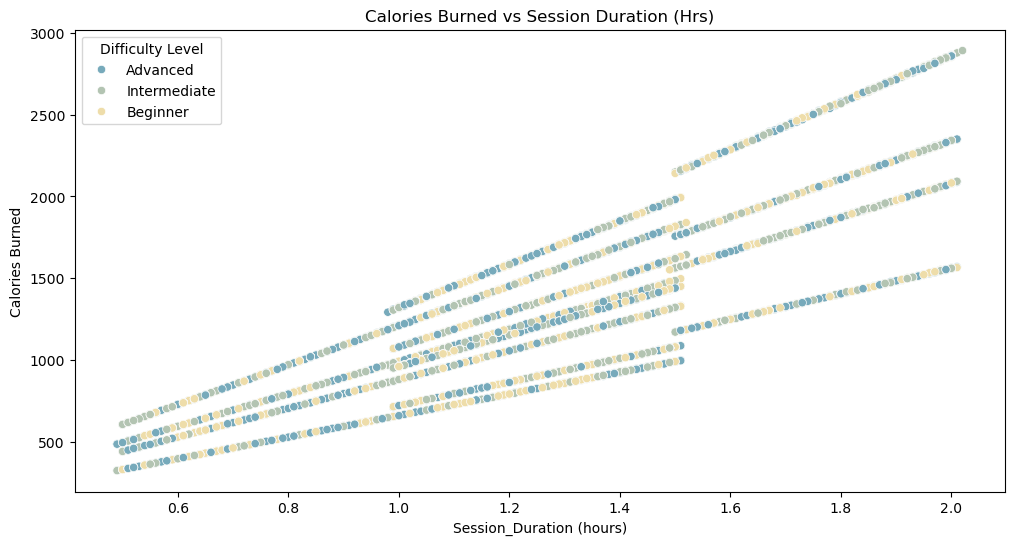

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Session_Duration (hours)'], y=df['Calories_Burned'], hue=df['Difficulty Level'], palette='blend:#7AB,#EDA')
plt.title('Calories Burned vs Session Duration (Hrs)')
plt.xlabel('Session_Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

### 4. Workout Frequency By Fat Percentage

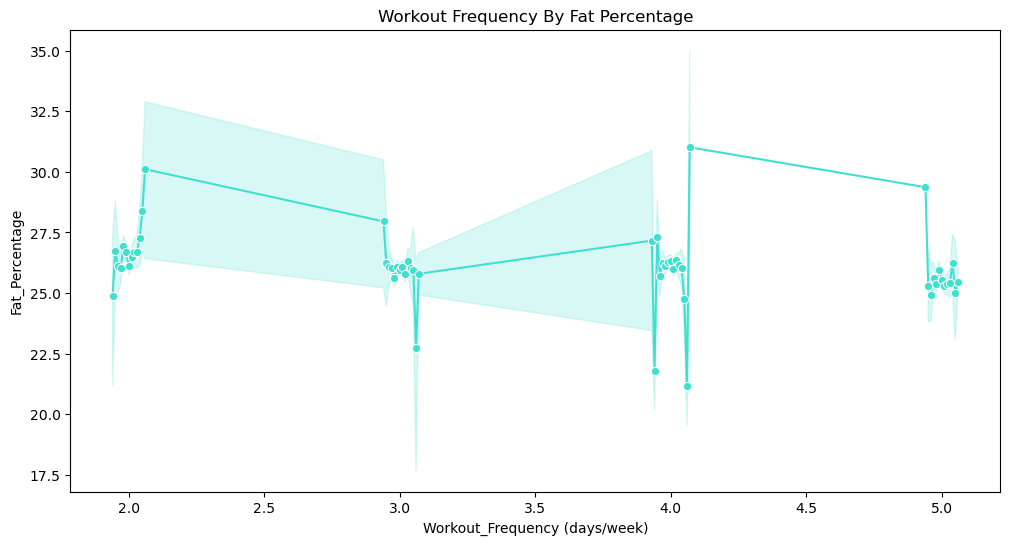

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Workout_Frequency (days/week)'], y=df['Fat_Percentage'], marker='o', color='turquoise')
plt.title('Workout Frequency By Fat Percentage')
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Fat_Percentage')
plt.show()

### 5. Distribution Of Height (cm) vs Weight (kg)

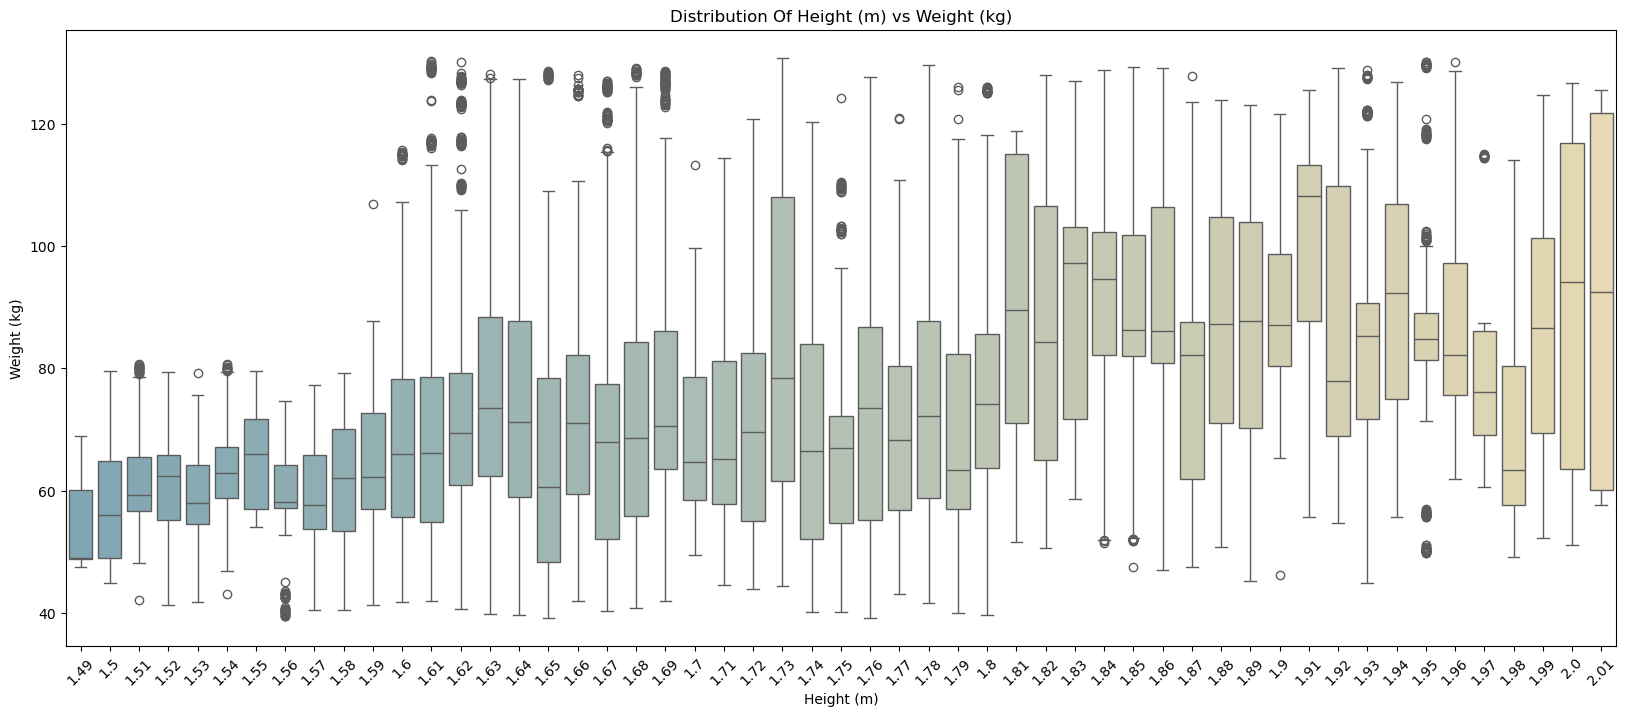

In [52]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['Height (m)'], y=df['Weight (kg)'], data=df, palette='blend:#7AB,#EDA')
plt.title('Distribution Of Height (m) vs Weight (kg)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

### 6. Workout Type vs Calories Burned

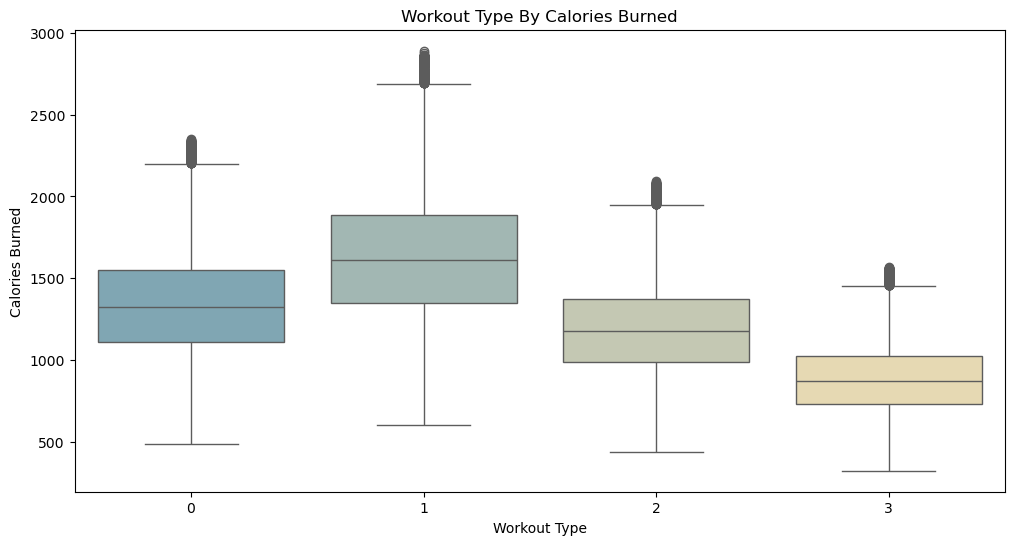

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Workout_Type'], y=df['Calories_Burned'], data=df, palette='blend:#7AB,#EDA')
plt.title('Workout Type By Calories Burned')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()

### 7. Cooking Method Of Meal Types

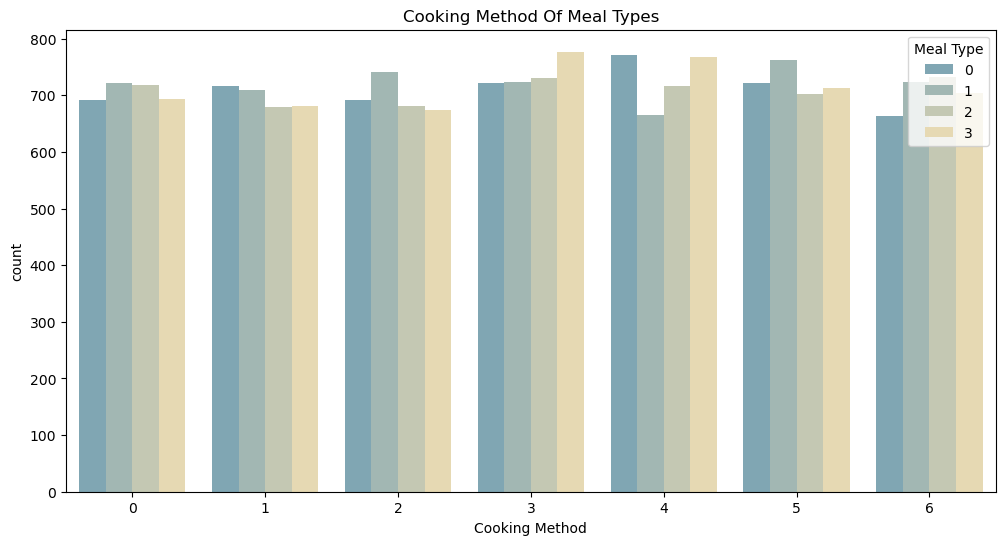

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['cooking_method'], hue=df['meal_type'], palette='blend:#7AB,#EDA')
plt.title('Cooking Method Of Meal Types')
plt.xlabel('Cooking Method')
plt.ylabel('count')
plt.legend(title='Meal Type')
plt.show()

### 8. Max BPM vs Avg BPM

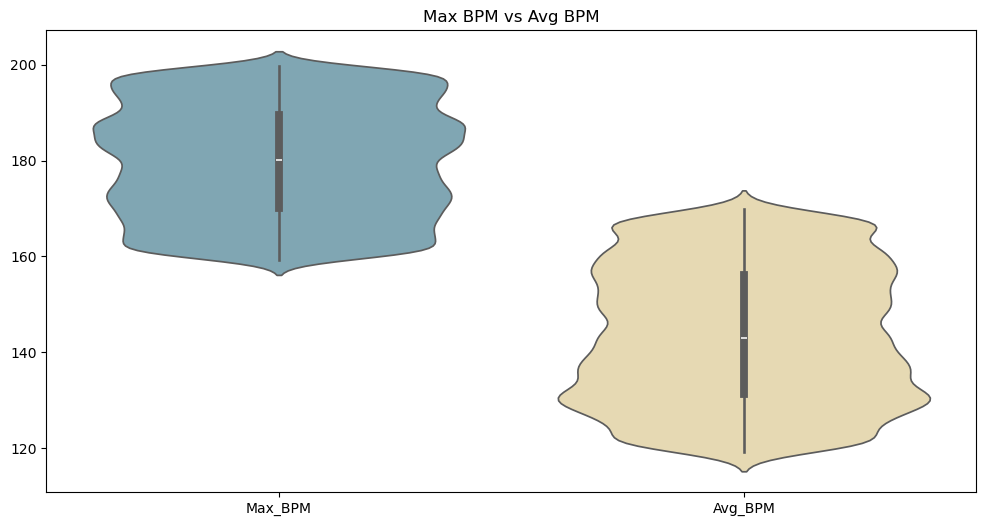

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Max_BPM','Avg_BPM']], palette='blend:#7AB,#EDA')
plt.title('Max BPM vs Avg BPM')
plt.show()

### 9. Correlation Map

In [34]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,is_healthy,Sets,Reps,Burns Calories (per 30 min)
0,34.91,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,...,1729.94,285.05,120.47,16.24,110.79,1.31,-0.00,4.99,20.91,342.58
1,23.37,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,...,693.08,300.61,109.15,16.47,12.01,1.92,0.01,4.01,16.15,357.16
2,33.20,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,...,2142.48,215.42,399.43,54.35,6.09,4.70,0.00,5.00,21.90,359.63
3,38.69,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,...,123.20,9.70,314.31,27.73,103.72,4.85,0.01,4.01,16.92,351.65
4,45.09,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,...,1935.11,116.89,99.22,34.16,46.55,3.07,0.01,4.99,15.01,329.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,98.31,1.90,199.20,148.18,63.72,0.77,761.61,27.505498,2.99,...,1241.30,243.54,190.52,41.69,91.78,4.31,-0.01,4.99,17.14,346.27
19996,40.38,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,26.180562,3.52,...,1853.10,188.76,468.81,20.80,12.98,1.90,0.00,5.01,23.08,332.64
19997,50.31,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,23.331802,2.81,...,1808.43,80.47,244.51,23.04,61.14,2.01,1.00,4.00,18.91,352.19
19998,52.36,44.30,1.62,179.27,121.23,60.88,1.41,929.75,18.985868,1.59,...,2125.57,245.91,402.26,39.25,99.85,2.98,-0.01,3.99,24.97,329.22


In [35]:
correlation = numeric_df.corr()

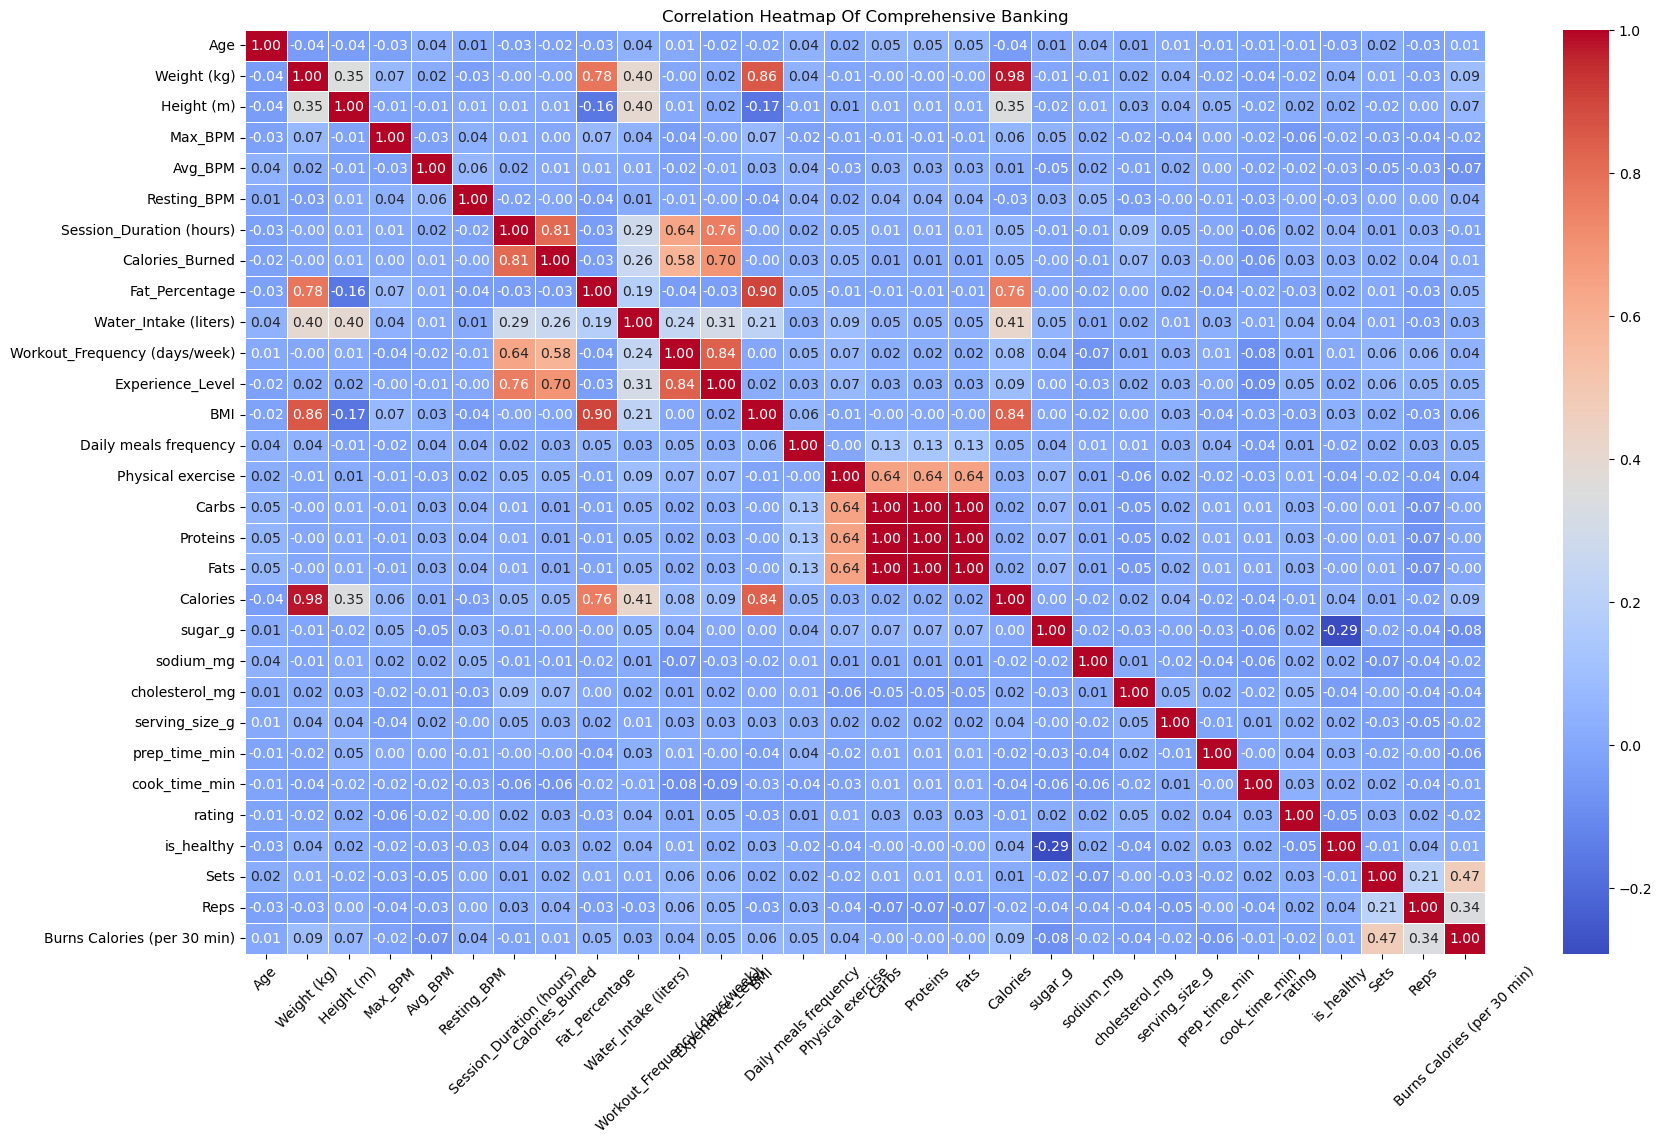

In [37]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Comprehensive Banking')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

In [39]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
df['Workout_Type'].unique()

array(['Strength', 'HIIT', 'Cardio', 'Yoga'], dtype=object)

In [41]:
df['meal_type'].unique()

array(['Lunch', 'Breakfast', 'Snack', 'Dinner'], dtype=object)

In [42]:
df['diet_type'].unique()

array(['Vegan', 'Vegetarian', 'Paleo', 'Keto', 'Low-Carb', 'Balanced'],
      dtype=object)

In [43]:
df['cooking_method'].unique()

array(['Grilled', 'Fried', 'Boiled', 'Baked', 'Steamed', 'Raw', 'Roasted'],
      dtype=object)

In [44]:
df['Difficulty Level'].unique()

array(['Advanced', 'Intermediate', 'Beginner'], dtype=object)

In [45]:
val = {'Workout_Type': {'Strength': 0, 'HIIT': 1, 'Cardio': 2, 'Yoga': 3}, 
       'meal_type': {'Breakfast': 0, 'Lunch': 1, 'Snack': 2, 'Dinner': 3},
       'diet_type': {'Vegan': 0, 'Vegetarian': 1, 'Paleo': 2, 'Keto': 3, 'Low-Carb': 4, 'Balanced': 5},
       'cooking_method': {'Grilled': 0, 'Fried': 1, 'Boiled': 2, 'Baked': 3, 'Steamed': 4, 'Raw': 5, 'Roasted': 6},
       'Gender': {'Female': 0, 'Male': 1}
       }
df.replace(val, inplace=True)
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,0,...,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,1,...,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,2,...,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,1,...,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,0,...,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,0,98.31,1.90,199.20,148.18,63.72,0.77,761.61,0,...,4.99,17.14,Improves cardiovascular fitness,346.27,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Arms,Anterior,Triceps pushdowns
19996,40.38,0,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,0,...,5.01,23.08,Strengthens back and legs,332.64,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Arms,Lats,Seated calf raises
19997,50.31,1,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,0,...,4.00,18.91,Builds shoulder width,352.19,"Upper Back, Rear Deltoids",Barbell,Beginner,Forearms,Wrist Extensors,Russian twists
19998,52.36,1,44.30,1.62,179.27,121.23,60.88,1.41,929.75,3,...,3.99,24.97,Builds calf muscles,329.22,"Rear Deltoids, Upper Back",Pull-up Bar,Intermediate,Shoulders,Anterior,Leg curls


In [46]:
features = ['Age', 'Height (m)', 'Weight (kg)', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned','Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI', 'Daily meals frequency', 'Physical exercise', 'is_healthy']
target = 'Workout_Type'

X = df[features]
y = df[target]

### 1. Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16000, 13) (4000, 13)


### 2. Models

In [58]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [59]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.46

 Decison Tree Accuracy: 0.9985

 Random Forest Accuracy: 0.99

 Gradient Boosting Accuracy: 0.9935

 K-Nearest Neighbors Accuracy: 0.785

 Support Vector Machine Accuracy: 0.47825


#### Best Model

In [60]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.47825


### 3. Classification Report

In [61]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.31      0.33      1007
           1       0.53      0.63      0.57      1023
           2       0.41      0.19      0.26       944
           3       0.53      0.75      0.62      1026

    accuracy                           0.48      4000
   macro avg       0.46      0.47      0.45      4000
weighted avg       0.46      0.48      0.45      4000



### 4. Confusion Matrix

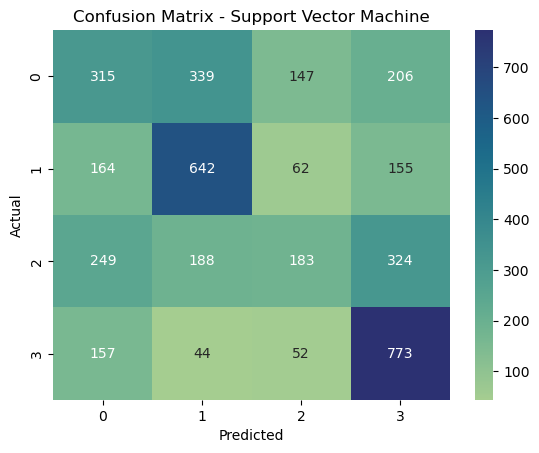

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()